In [1]:
import arc
from arc import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Latex
import scipy
h = scipy.constants.h

In [4]:
ns = np.arange(60,120)
deltas1 = []
deltas2 = []
deltas3 = []
deltas4 = []

jp1 = (3/2,3/2)
jp2 = (1/2,3/2)
jp3 = (3/2,1/2)
jp4 = (1/2,1/2)


for n in ns:
    calculation = arc.Caesium()
    delta = calculation.getEnergyDefect(n, 0, 1/2, n, 1, jp1[0], n-1, 1, jp1[1])
    deltas1.append(delta/h/1e9)

    delta = calculation.getEnergyDefect(n, 0, 1/2, n, 1, jp2[0], n-1, 1, jp2[1])
    deltas2.append(delta/h/1e9)

    delta = calculation.getEnergyDefect(n, 0, 1/2, n, 1, jp3[0], n-1, 1, jp3[1])
    deltas3.append(delta/h/1e9)

    delta = calculation.getEnergyDefect(n, 0, 1/2, n, 1, jp4[0], n-1, 1, jp4[1])
    deltas4.append(delta/h/1e9)



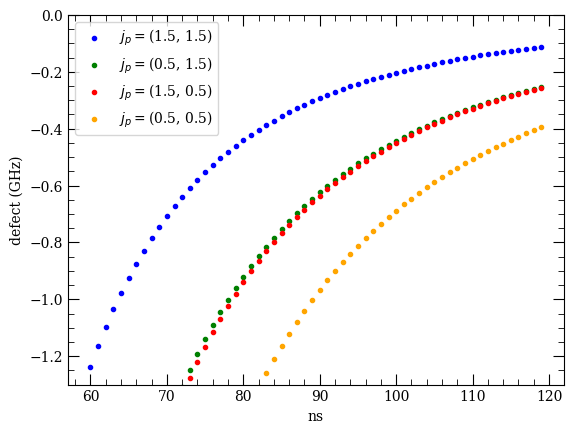

In [5]:
plt.figure()
plt.scatter(ns,deltas1, label='$j_p =$' + str(jp1), color = 'blue', marker='.')
plt.scatter(ns,deltas2, label='$j_p =$' + str(jp2), color = 'green', marker='.')
plt.scatter(ns,deltas3, label='$j_p =$' + str(jp3), color = 'red', marker='.')
plt.scatter(ns,deltas4, label='$j_p =$' + str(jp4), color = 'orange', marker='.')

plt.legend()
plt.ylabel('defect (GHz)')
plt.xlabel('ns')

plt.ylim([-1.3,0])

plt.show()

In [6]:
deltas = []
na_nbs = []

In [7]:
ns = np.arange(30,140)
dif=3
deltas1 = []
deltas2 = []
deltas3 = []
deltas4 = []

jlabels = ('$j_{p1}$', '$j_{p2}$', '$j_{p3}$', '$j_{p4}$')
jp1 = (3/2,3/2)
jp2 = (1/2,3/2)
jp3 = (3/2,1/2)
jp4 = (1/2,1/2)

jps = [jp1,jp2,jp3,jp4]

for n in ns:
    nb = n+dif
    calculation = arc.Caesium()
    delta = calculation.getEnergyDefect2(n, 0, 1/2, nb, 0, 1/2, n, 1, jp1[0], nb-1, 1, jp1[1])
    deltas1.append(delta/h/1e9)

    delta = calculation.getEnergyDefect2(n, 0, 1/2, nb, 0, 1/2, n, 1, jp2[0], nb-1, 1, jp2[1])
    deltas2.append(delta/h/1e9)

    delta = calculation.getEnergyDefect2(n, 0, 1/2, nb, 0, 1/2, n, 1, jp3[0], nb-1, 1, jp3[1])
    deltas3.append(delta/h/1e9)

    delta = calculation.getEnergyDefect2(n, 0, 1/2, nb, 0, 1/2, n, 1, jp4[0], nb-1, 1, jp4[1])
    deltas4.append(delta/h/1e9)



In [8]:
min_defects = [min(np.array(deltas1), key=abs), 
               min(np.array(deltas2), key=abs), 
               min(np.array(deltas3), key=abs), 
               min(np.array(deltas4), key=abs)]
assoc_ns = [ns[deltas1.index(min_defects[0])],
            ns[deltas2.index(min_defects[1])],
            ns[deltas3.index(min_defects[2])],
            ns[deltas4.index(min_defects[3])]]

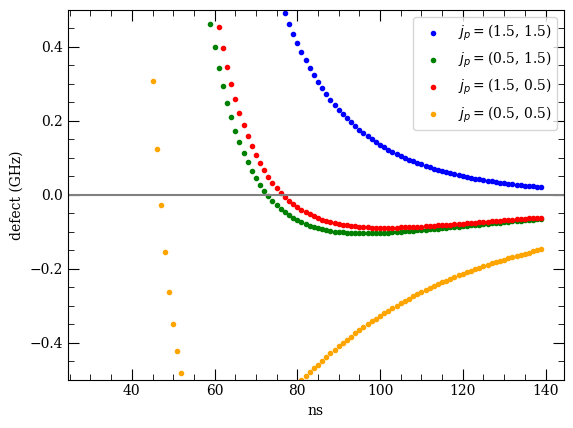

channel = |Rb 139s_1/2, Rb 142s_1/2> -> |Rb 139p_1.5, Rb 141p_1.5>
j_pa, j_pb = (1.5, 1.5)
min defect = 20.819265842192806
n = 139
channel = |Rb 73s_1/2, Rb 76s_1/2> -> |Rb 73p_0.5, Rb 75p_1.5>
j_pa, j_pb = (0.5, 1.5)
min defect = -3.8429777370145284
n = 73
channel = |Rb 77s_1/2, Rb 80s_1/2> -> |Rb 77p_1.5, Rb 79p_0.5>
j_pa, j_pb = (1.5, 0.5)
min defect = -5.712149830591068
n = 77
channel = |Rb 47s_1/2, Rb 50s_1/2> -> |Rb 47p_0.5, Rb 49p_0.5>
j_pa, j_pb = (0.5, 0.5)
min defect = -28.195209079921668
n = 47


In [9]:
plt.figure()
plt.scatter(ns,deltas1, label='$j_p =$' + str(jp1), color = 'blue', marker='.')
plt.scatter(ns,deltas2, label='$j_p =$' + str(jp2), color = 'green', marker='.')
plt.scatter(ns,deltas3, label='$j_p =$' + str(jp3), color = 'red', marker='.')
plt.scatter(ns,deltas4, label='$j_p =$' + str(jp4), color = 'orange', marker='.')

plt.axhline(y=0, color='grey')
plt.legend()
plt.ylabel('defect (GHz)')
plt.xlabel('ns')

plt.ylim([-0.5,0.5])

plt.show()
for i in range(4):
    print(f'channel = |Rb {assoc_ns[i]}s_1/2, Rb {assoc_ns[i]+dif}s_1/2> -> |Rb {assoc_ns[i]}p_{jps[i][0]}, Rb {assoc_ns[i]+dif-1}p_{str(jps[i][1])}>')
    print(f'j_pa, j_pb = {jps[i]}')
    print(f'min defect = {min_defects[i]*1e3}')
    print(f'n = {assoc_ns[i]}')



Calculating Hamiltonian matrix...


	matrix (dimension  18 )

Matrix R3 100.0 % (state 10 of 10)

                  ARPACK can only find up to dimension-1 eigenvectors, where                dimension is matrix dimension.



Diagonalizing interaction matrix...

99% Now we are plotting...


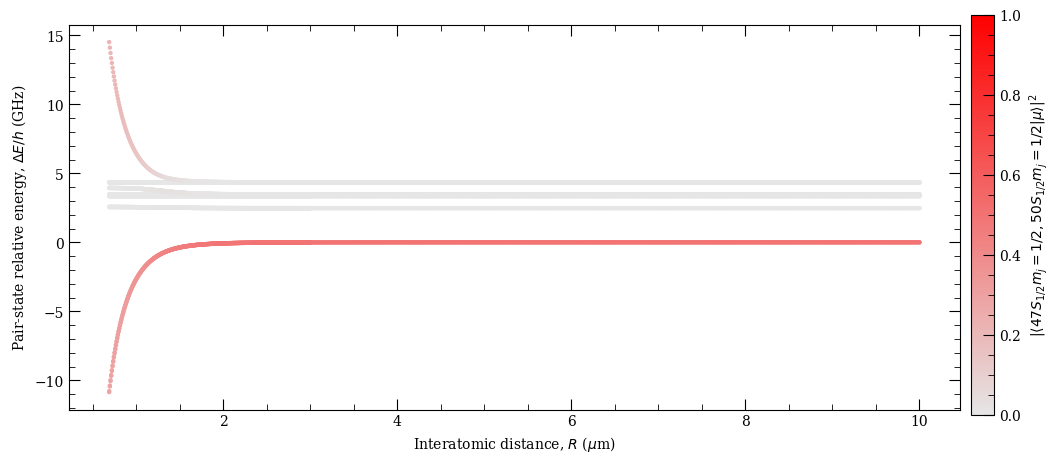

In [16]:
channel = 3

pair = PairStateInteractions(Rubidium(), assoc_ns[channel], 0, 1/2, assoc_ns[channel]+dif, 0, 1/2, 1/2, 1/2)

pair.defineBasis(0, 0, 3, 1, 6e9, progressOutput=True)

rvdw = pair.getLeRoyRadius()

r = np.append(np.linspace(rvdw, 3, 300), np.linspace(3.01, 10.0, 300))

nEig = 250
pair.diagonalise(r, nEig, progressOutput=True)

pair.plotLevelDiagram()



Data points to fit =  514
It's estimated to be around 35.80 mu m from the current fit.
Rvdw =   35.79802078006527  mu m
offset =  0.0011594760463435954 
 scale =  96.3076601392899


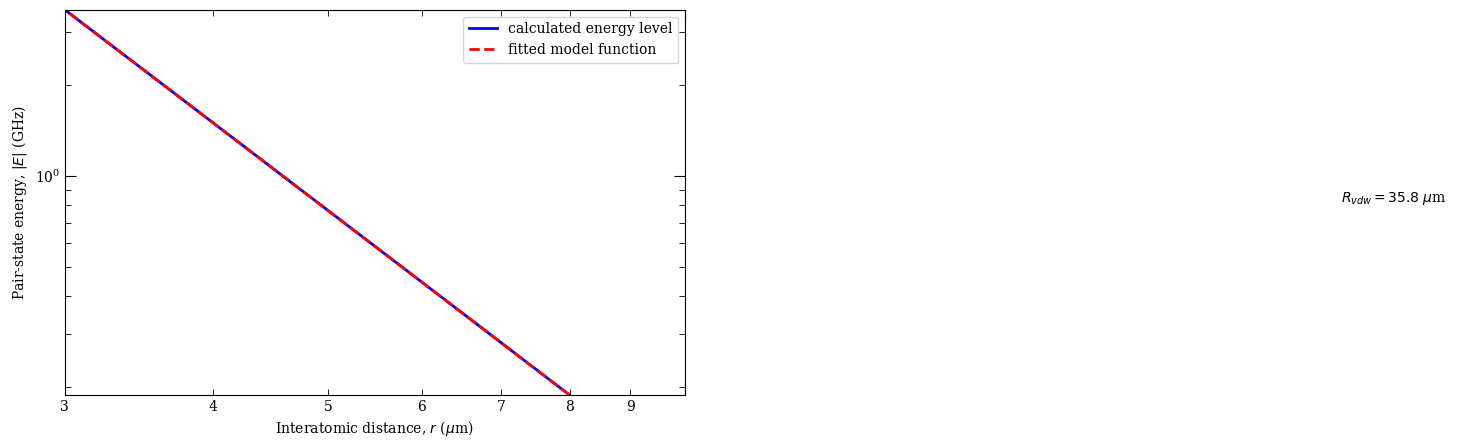

c3 =  96.30847175899657  GHz /R^3 (mu m)^3
offset =  -0.000921551402793625


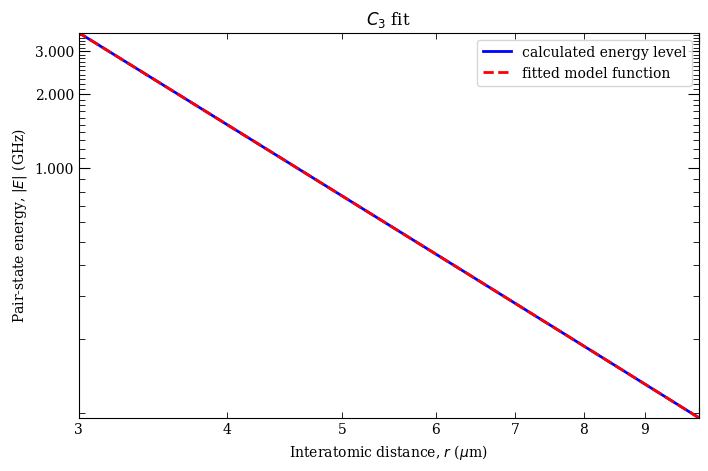


ERROR: could not find data for energy levels for interatomic
distances between 47 and 5.00 mu m.




0

In [41]:
rvdw = pair.getVdwFromLevelDiagram(
    1.000000, 8.000000, minStateContribution=0.2, showPlot=True
)
pair.getC3fromLevelDiagram(
    1.8, rvdw * 0.99, showPlot=True, minStateContribution=0.2
)
pair.getC6fromLevelDiagram(
    1.3 * rvdw, 5.0, showPlot=True, minStateContribution=0.2
)

In [ ]:
pair.showPlot()

In [ ]:
# C3 coefficients


C3 = arc.Rubidium().getC3term(assoc_ns[i], 0, )